In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

In [2]:
kospi=pdr.get_data_yahoo('^KS11', start='2004-01-01')
kosdak=pdr.get_data_yahoo('^KQ11', start='2004-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


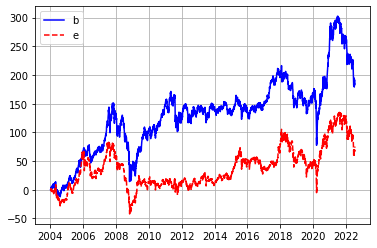

In [4]:
kospi_dpc=(kospi['Close']/kospi['Close'].shift(1)-1)*100
kosdak_dpc=(kosdak['Close']/kosdak['Close'].shift(1)-1)*100
kospi_dpc.iloc[0]=0
kosdak_dpc.iloc[0]=0

kospi_dpc_cp=((100+kospi_dpc)/100).cumprod()*100-100
kosdak_dpc_cp=((100+kosdak_dpc)/100).cumprod()*100-100

plt.plot(kospi.index, kospi_dpc_cp, 'b', label='kospi')
plt.plot(kosdak.index, kosdak_dpc_cp, 'r--', label='kosdak')
plt.grid(True)
plt.legend('best')
plt.show()

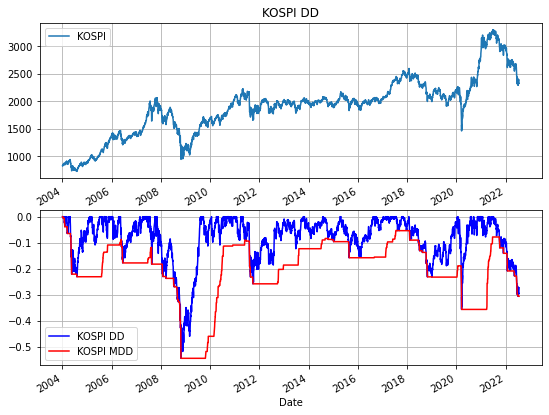

In [10]:
window=252
peak=kospi['Close'].rolling(window, min_periods=1).max()
drawdown=kospi['Close']/peak-1.0
drawdown=kospi['Close']/peak-1.0
max_dd=drawdown.rolling(window, min_periods=1).min()

plt.figure(figsize=(9,7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI DD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

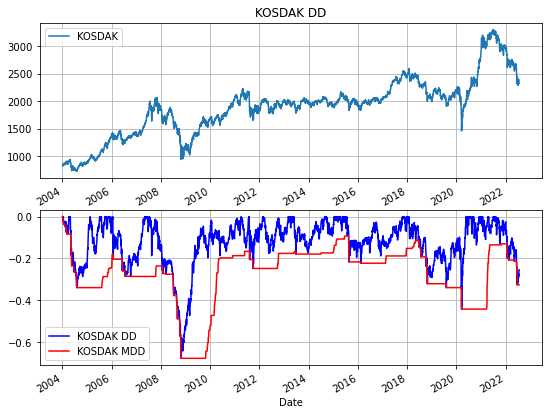

In [11]:
widow=252
peak=kosdak['Close'].rolling(window, min_periods=1).max()
drawdown=kosdak['Close']/peak-1
max_dd=drawdown.rolling(window, min_periods=1).min()

plt.figure(figsize=(9,7))
plt.subplot(211)
kospi['Close'].plot(label='KOSDAK', title='KOSDAK DD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSDAK DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSDAK MDD', grid=True, legend=True)
plt.show()